In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import tensorflow
from tensorflow import keras
%matplotlib inline


In [24]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [25]:
batch_size = 128
num_class = 10
epochs = 10

In [26]:
keras.backend.image_data_format()

'channels_last'

In [27]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

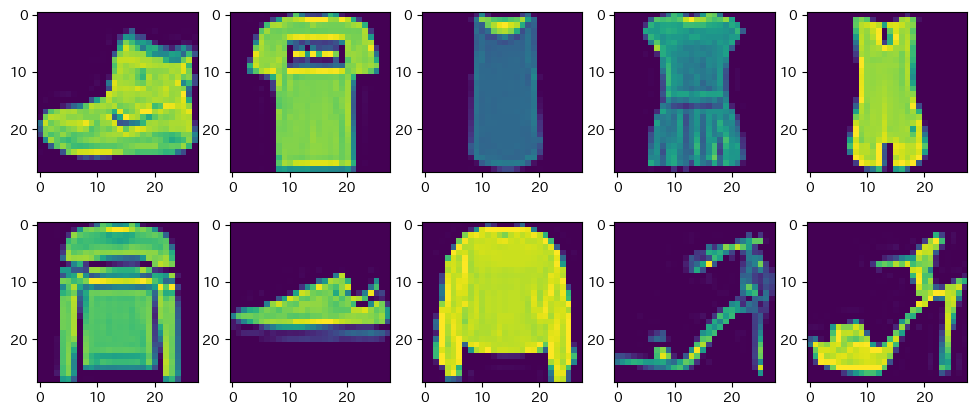

In [28]:
plt.figure(figsize=(12,5))
for i in range(0,10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i].reshape(28,28),cmap=None)

In [29]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [30]:
X_train,X_test = X_train/255.0,X_test/255.0

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_class,activation='softmax'))

In [32]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
history = model.fit(X_train,y_train,epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.4667 - accuracy: 0.8348
Epoch 2/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.3106 - accuracy: 0.8880
Epoch 3/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.2661 - accuracy: 0.9037
Epoch 4/10
1875/1875 [==============================] - 117s 63ms/step - loss: 0.2341 - accuracy: 0.9146
Epoch 5/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.2103 - accuracy: 0.9228
Epoch 6/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.1946 - accuracy: 0.9279
Epoch 7/10
1875/1875 [==============================] - 123s 65ms/step - loss: 0.1823 - accuracy: 0.9334
Epoch 8/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.1669 - accuracy: 0.9374
Epoch 9/10
1875/1875 [==============================] - 98s 52ms/step - loss: 0.1571 - accuracy: 0.9409
Epoch 10/10
1875/1875 [==============================] -

In [35]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2427 - accuracy: 0.9198


[0.24271313846111298, 0.9197999835014343]

In [45]:
result_100 = model.predict(X_test[99:100])

1/1 [==============================] - 0s 23ms/step


In [46]:
result_100

array([[4.9557673e-07, 8.4267860e-15, 9.9887067e-01, 1.8013590e-09,
        8.5281263e-06, 2.8039267e-14, 1.1202984e-03, 5.3513821e-17,
        1.5564972e-10, 1.3532764e-13]], dtype=float32)

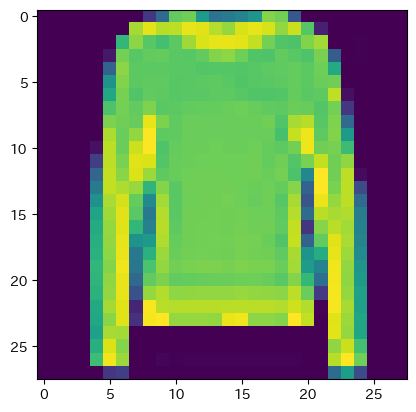

In [47]:
plt.imshow(X_test[99:100].reshape(28,28),cmap=None)
plt.show()